In [234]:
# Dependencies
import csv
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import pandas as pd

In [235]:
#import file as CSV
MSP = "Resources/NEIGHBORHOOD_CRIME_STATS.csv"
# Read the CSV into a Pandas DataFrame
MSP_Crimedf = pd.read_csv(MSP)
MSP_Crimedf.head (2)


,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017
1,2,** NOT ASSIGNED **,Arson,0.0,8,2017


In [236]:
#Drop neigborghood that are not defined ie.WRK_MSP_Crime_df2 = WRK_MSP_Crime_df1.loc[WRK_MSP_Crime_df["neighborhood"] != "Z_** NOT ASSIGNED **", "** NOT ASSIGNED **",:]
WRK_MSP_Crime_df = MSP_Crimedf.loc[MSP_Crimedf["neighborhood"] != "Z_** NOT ASSIGNED **",:]
WRK_MSP_Crime_df = MSP_Crimedf.loc[MSP_Crimedf["neighborhood"] != "** NOT ASSIGNED **",:]
WRK_MSP_Crime_df.head(2)


,OBJECTID,neighborhood,ucrDescription,number,reportMonth,reportYear
8,9,ARMATAGE,Aggravated Assault,0.0,8,2017
9,10,ARMATAGE,Arson,0.0,8,2017


In [237]:
#Check for missing Value
MSP_Crime_df.count()

OBJECTID          16192
neighborhood      16192
ucrDescription    16192
number            12902
reportMonth       16192
reportYear        16192
dtype: int64

In [238]:
#Remove Empty rows from records
no_null_crime_df = WRK_MSP_Crime_df.dropna(how='any')
no_null_crime_df.count()


OBJECTID          12855
neighborhood      12855
ucrDescription    12855
number            12855
reportMonth       12855
reportYear        12855
dtype: int64

In [239]:
#Rename Headers for Clarity 
Rename_Crime_df = no_null_crime_df.rename(
    columns={"ucrDescription": "Crimes", "reportMonth": "Month","reportYear": "Year","neighborhood": "Neighborhood","number": "Number"})
Rename_Crime_df.head ()
#Rename_Crime_df.index.values


,OBJECTID,Neighborhood,Crimes,Number,Month,Year
8,9,ARMATAGE,Aggravated Assault,0.0,8,2017
9,10,ARMATAGE,Arson,0.0,8,2017
10,11,ARMATAGE,Auto Theft,1.0,8,2017
11,12,ARMATAGE,Burglary,3.0,8,2017
12,13,ARMATAGE,Homicide,0.0,8,2017


In [240]:
# #Unique Counts in Neigborhood
# unique = Rename_Crime_df["Crimes"].unique()
# unique1 = Rename_Crime_df["Neighborhood"].unique()

In [242]:
#Combine Month and Year 
# Rename_Crime_df['Month'] = Rename_Crime_df['Month'].astype(str)
# Rename_Crime_df['Year'] = Rename_Crime_df['Year'].astype(str)
Rename_Crime_df['Number'] = Rename_Crime_df['Number'].astype(int)
# Rename_Crime_df['Month_Year'] = Rename_Crime_df ['Month']+ "_" + Rename_Crime_df['Year']
Rename_Crime_df['Month_Year']  = pd.to_datetime(Rename_Crime_df[['Year', 'Month']].assign(Day=1))
# Rename_Crime_df.head(5)
Rename_Crime_df.head(2)

,OBJECTID,Neighborhood,Crimes,Number,Month,Year,Month_Year
8,9,ARMATAGE,Aggravated Assault,0,8,2017,2017-08-01
9,10,ARMATAGE,Arson,0,8,2017,2017-08-01


In [219]:
Rename_Crime_Sort_df = Rename_Crime_df.sort_values(["Crimes"], ascending=True)
#Rename_Crime_Sort_df

In [252]:
TCrime_Neighboood = Rename_Crime_Sort_df.groupby(['Neighborhood', 'Month_Year'])['Number'].sum()
TCrime_Neighboood.head()

Neighborhood  Month_Year
ARMATAGE      2017-08-01    11
              2017-09-01    13
              2017-10-01     7
              2017-11-01     9
              2017-12-01    16
Name: Number, dtype: int32

In [281]:
TCrime_Month_Year = Rename_Crime_df.groupby(['Crimes', 'Month_Year'])['Number'].sum()
TCrime_Month_Year.head (5)

Crimes              Month_Year
Aggravated Assault  2017-08-01    200
                    2017-09-01    186
                    2017-10-01    172
                    2017-11-01    191
                    2017-12-01    126
Name: Number, dtype: int32

In [301]:
Total Number committed in Year
TCrime_Year = Rename_Crime_df.groupby(['Crimes', 'Year'])['Number'].sum()
TCrime_Year.head 

<bound method NDFrame.head of Crimes              Year
Aggravated Assault  2017      875
                    2018     1791
                    2019      924
Arson               2017       52
                    2018       71
                    2019       33
Auto Theft          2017      973
                    2018     2207
                    2019     1283
Burglary            2017     1711
                    2018     3057
                    2019     1382
Homicide            2017       16
                    2018       30
                    2019       13
Larceny             2017     5517
                    2018    11486
                    2019     5770
Rape                2017      200
                    2018      450
                    2019      255
Robbery             2017      721
                    2018     1178
                    2019      520
Name: Number, dtype: int32>

In [306]:
#Counts of all the month crimes were committed in all the neighbourhood 
Month = Rename_Crime_df.groupby(['Crimes', 'Year'])['Month'].count()
TCrime_Month

Crimes              Year
Aggravated Assault  2017     275
                    2018     841
                    2019     528
Arson               2017     116
                    2018     639
                    2019     528
Auto Theft          2017     338
                    2018     900
                    2019     528
Burglary            2017     388
                    2018     955
                    2019     528
Homicide            2017     101
                    2018     626
                    2019     528
Larceny             2017     424
                    2018    1027
                    2019     528
Rape                2017     197
                    2018     728
                    2019     528
Robbery             2017     269
                    2018     807
                    2019     528
Name: Month, dtype: int64

In [313]:
#Average Crime committed in each year
ACY = TCrime_Year / TCrime_Month
ACY

Crimes              Year
Aggravated Assault  2017      3.18182
                    2018      2.12961
                    2019         1.75
Arson               2017     0.448276
                    2018     0.111111
                    2019       0.0625
Auto Theft          2017       2.8787
                    2018      2.45222
                    2019      2.42992
Burglary            2017      4.40979
                    2018      3.20105
                    2019      2.61742
Homicide            2017     0.158416
                    2018    0.0479233
                    2019    0.0246212
Larceny             2017      13.0118
                    2018       11.184
                    2019       10.928
Month                             NaN
Rape                2017      1.01523
                    2018     0.618132
                    2019     0.482955
Robbery             2017       2.6803
                    2018      1.45973
                    2019     0.984848
dtype: object

In [314]:
AverageCY = ACY.dropna(how='any')
AverageCY

Crimes              Year
Aggravated Assault  2017      3.18182
                    2018      2.12961
                    2019         1.75
Arson               2017     0.448276
                    2018     0.111111
                    2019       0.0625
Auto Theft          2017       2.8787
                    2018      2.45222
                    2019      2.42992
Burglary            2017      4.40979
                    2018      3.20105
                    2019      2.61742
Homicide            2017     0.158416
                    2018    0.0479233
                    2019    0.0246212
Larceny             2017      13.0118
                    2018       11.184
                    2019       10.928
Rape                2017      1.01523
                    2018     0.618132
                    2019     0.482955
Robbery             2017       2.6803
                    2018      1.45973
                    2019     0.984848
dtype: object

In [322]:
# >>> ax.get_children()


Text(0, 0.5, 'Average Crime')

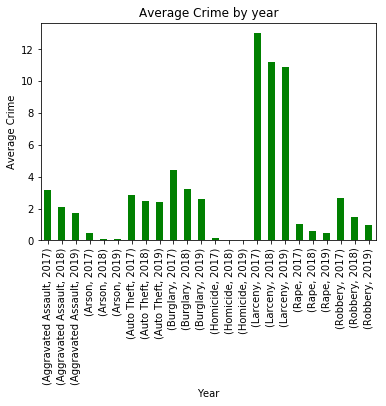

In [319]:
#remove empty records
Avg_year_chart = AverageCY.plot(kind="bar", color = "g", title="Average Crime by year")
Avg_year_chart.set_xlabel("Year")
Avg_year_chart.set_ylabel("Average Crime")


In [324]:
#save your bar chart
Avg_year_chart.savefig("Average_Crime_Bar_Chart")

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

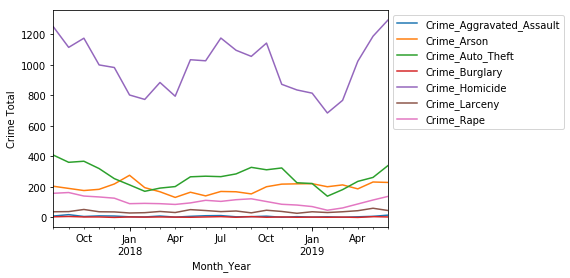

In [227]:
# # Set values for Y & X axis 
Crime_Aggravated_Assault = TCrime_Month_Year.loc["Aggravated Assault"]
Crime_Arson = TCrime_Month_Year.loc["Arson"]
Crime_Auto_Theft = TCrime_Month_Year.loc["Auto Theft"]
Crime_Burglary = TCrime_Month_Year.loc["Burglary"]
Crime_Homicide = TCrime_Month_Year.loc["Homicide"]
Crime_Larceny = TCrime_Month_Year.loc["Larceny"]
Crime_Rape = TCrime_Month_Year.loc["Rape"]
Crime_Robbery  = TCrime_Month_Year.loc["Robbery"]

# y-axis = [Crime_Aggravated_Assault,Crime_Arson,Crime_Auto_Theft,Crime_Burglary,Crime_Homicide, Crime_Larceny, Crime_Rape, Crime_Robbery]
# x_axis = 
# # # y = TCrime_Month_Year[2]
# # # ax.plot(x[0], x[1]);

# ax = Crime_Aggravated_Assault.plot(x="Month_Year")
ax = Crime_Arson.plot(x="Month_Year", y=[Crime_Arson])
ax = Crime_Auto_Theft.plot(x="Month_Year", y=[Crime_Auto_Theft])
ax = Crime_Burglary.plot(x="Month_Year", y=[Crime_Burglary])
ax = Crime_Homicide.plot(x="Month_Year", y=[Crime_Homicide])
ax = Crime_Larceny.plot(x="Month_Year", y=[Crime_Larceny])
ax = Crime_Rape.plot(x="Month_Year", y=[Crime_Rape])
ax = Crime_Robbery.plot(x="Month_Year", y=[Crime_Robbery])
ax.set_ylabel("Crime Total")
ax.legend(["Crime_Aggravated_Assault","Crime_Arson", "Crime_Auto_Theft","Crime_Burglary","Crime_Homicide", "Crime_Larceny","Crime_Rape","Crime_Robbery"  ],loc="best",bbox_to_anchor=(1,1))

In [232]:
# Save the plot and display it
ax.plot.savefig("Resources/CT_Graph")


AttributeError: 'function' object has no attribute 'savefig'